# Simple Convolutions

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import xlensing

In [2]:
def x2(x):
  return x*x

In [128]:
from scipy.integrate import simpson

def unitophat(x,low,high):
  result = np.heaviside(x-low,1)-np.heaviside(x-high,1)
  return result/(high-low)

In [108]:
profile = lambda r : xlensing.model.NFW_shear(1e14,4,0.3,1,.1,0,r)['NFW Signal']

In [121]:
xlensing.model.NFW_shear(1e14,4,0.3,1,.1,0,np.array([.1]))['NFW Signal']

array([123.90785546])

In [112]:
def conv(f,g,x):
  dt = np.diff(x)
  return lambda t : sum(f(x[:-1])*g(x[:-1]-t)*dx)
  

In [129]:
unitophat(radii,.1,.2)

array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [126]:
np.convolve(prof,unitophat(radii,.1,.2),'same')

array([29.88435054, 28.99066169, 28.13852564, 27.32533571, 26.54868995,
       25.80637188, 25.09633338, 24.41667943, 23.76565435, 23.14162963,
       22.54309283, 21.96863772, 21.41695533, 20.88682594, 20.37711173,
       19.88675022, 19.41474834, 18.9601769 , 18.52216576, 18.09989928,
       17.69261225, 17.29958614, 16.92014568, 16.55365577, 16.19951857,
       15.85717092, 15.52608188, 15.20575058, 14.89570412, 14.59549572,
       14.30470298, 14.02292631, 13.7497874 , 13.48492793, 13.22800822,
       12.97870615, 12.73671599, 12.50174746, 12.27352477, 12.05178573,
       11.83628099, 11.62677324, 11.42303655, 11.22485566, 11.03202545,
       10.8443503 , 10.6616436 , 10.48372723, 10.31043111, 10.14159274,
        9.97705685,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

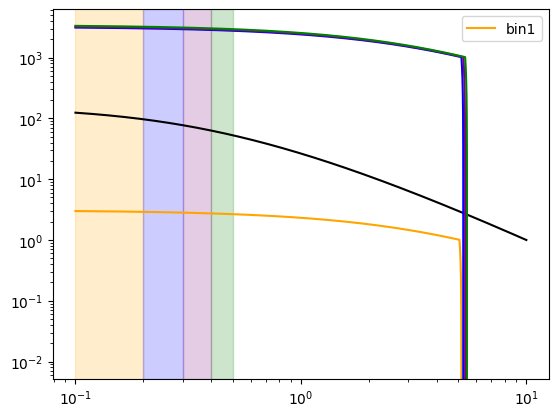

In [146]:
radii = linspace(1e-1,1e1,10000)
prof = profile(radii)
loglog(radii,prof,color='black')
conv=np.convolve(prof,unitophat(radii,.1,.2),'same')*np.diff(radii)[0]
loglog(radii,conv,color='orange',label='bin1')
axvspan(0.1, .2,color='orange', alpha=0.2)

conv=np.convolve(prof,unitophat(radii,.2,.3),'same')
loglog(radii,conv,color='blue')
axvspan(0.2, .3,color='blue', alpha=0.2)

conv=np.convolve(prof,unitophat(radii,.3,.4),'same')
loglog(radii,conv,color='purple')
axvspan(0.3, .4,color='purple', alpha=0.2)

conv=np.convolve(prof,unitophat(radii,.4,.5),'same')
loglog(radii,conv,color='green')
axvspan(0.4, .5,color='green', alpha=0.2)
legend()